In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity


In [2]:
# 음식, 음식점 데이터 merge
import pandas as pd
import numpy as np

menu = pd.read_csv("new_df.csv")
menu

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
0,10000.0,Y,"야채,미꾸라지",한식,추어탕
1,15000.0,N,밀가루,한식,닭강정
2,5500.0,N,"야채,쌀",한식,비빔밥
3,10000.0,Y,"야채,도토리",한식,도토리묵무침
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비
...,...,...,...,...,...
258,10000.0,N,"새우,오징어,쌀,계란,꽈리고추,가지,단호박,밀가루,김,팽이버섯",일식,텐동
259,4900.0,N,"야채,닭가슴살,빵,방울토마토",일식,데리야키
260,4500.0,N,"밀가루,닭껍질",한식,닭껍질튀김
261,3800.0,N,"버터,계란,밀가루,설탕",양식,크로플


In [3]:
list(menu['메뉴설명(MENU_DSCRN)'])

['야채,미꾸라지',
 '밀가루',
 '야채,쌀',
 '야채,도토리',
 '야채,고추,닭고기,양배추',
 '야채,메밀면,오이,육수',
 '야채,황태',
 '야채,고추,가자미',
 '야채,면',
 '보리',
 '야채,쌀,돼지내장,당면',
 '쌀,계란,곤드레',
 '생선회,송어',
 '고추,닭발',
 '계란,밀가루,딸기',
 '사과,카라멜',
 '인삼,닭고기,엄나무',
 '인삼,마늘,닭고기,찹쌀',
 '야채,닭고기,감자',
 '야채,오리고기',
 '야채,순두부',
 '인삼,오리고기,마늘,찹쌀',
 '치즈',
 '새우,밀가루,면,가쓰오부시',
 '야채,소갈비',
 '치즈,베이컨',
 '닭고기,밀가루',
 '야채,닭고기,밀가루,파',
 '닭고기,밀가루',
 '감자',
 '갈비',
 '야채,두부',
 '야채,두부',
 '황태',
 '해산물,밀가루,파',
 '야채,오징어',
 '야채,쌀',
 '야채,햄,캔참치',
 '밀가루',
 '고추,밀가루,소시지',
 '치즈,밀가루',
 '야채,곱창',
 '김치,밀가루',
 '밀가루,파',
 '고기',
 '야채,두부,고기,떡,밀가루',
 '소갈비',
 '돼지갈비',
 '삼겹살',
 '야채,메밀면,계란,육수',
 '야채,메밀면,계란',
 '메밀면',
 '야채,돼지고기,면',
 '야채,해산물,면,굴',
 '우유',
 '야채,소고기,쌀,김',
 '야채,참치,쌀,김',
 '야채,치즈,쌀,김',
 '야채,떡,어묵',
 '야채,떡,어묵',
 '야채,돼지고기,전분',
 '야채,김치',
 '야채,고추,김치,두부,햄',
 '야채,돼지고기',
 '야채,메밀면,계란,육수',
 '야채,갈비,김치',
 '김치,두부',
 '소고기',
 '메밀면',
 '야채,면,멸치육수',
 '오리고기',
 '소고기,돼지고기',
 '쌀,단호박',
 '야채,김치,돼지고기',
 '돼지고기',
 '면,열무김치',
 '야채,두부,고기,밀가루',
 '야채,두부,고기,밀가루',
 '야채,두부,고기,밀가루',
 '야채,돼지고기,쌀',
 '야채,해산물,쌀',
 '야채,고기,쌀,버섯,당면',

### 메뉴재료로만 유사도 계산

**Scikit-Learn 의 문서 전처리 기능**

BOW (Bag of Words) 문서를 숫자 벡터로 변환하는 가장 기본적인 방법은 BOW (Bag of Words)이다. BOW 방법에서는 전체 문서 {d1,d2,…,dn} 를 구성하는 고정된 단어장(vocabulary) {t1,t2,…,tm}를 만들고 di라는 개별 문서에 단어장에 해당하는 단어들이 포함되어 있는지를 표시하는 방법이다.

xi,j=문서 di내의 단어 tj의 출현 빈도

또는

xi,j = 0 : 만약 단어 tj가 문서 di 안에 없으면 1 : 만약 단어 tj가 문서 di 안에 있으면

TfidfVectorizer : CountVectorizer와 비슷하지만 TF-IDF 방식으로 단어의 가중치를 조정한 BOW 벡터를 만든다. -> TF-IDF(Term Frequency – Inverse Document Frequency) 인코딩은 단어를 갯수 그대로 카운트하지 않고 모든 문서에 공통적으로 들어있는 단어의 경우 문서 구별 능력이 떨어진다고 보아 가중치를 축소하는 방법이다.

In [4]:
# n-그램:단어장 생성에 사용할 토큰의 크기를 결정한다. 모노그램(1-그램)은 토큰 하나만 단어로 사용하며 바이그램(2-그램)은 두 개의 연결된 토큰을 하나의 단어로 사용한다.
# Stop Words:문서에서 단어장을 생성할 때 무시할 수 있는 단어를 말한다. 보통 영어의 관사나 접속사, 한국어의 조사 등이 여기에 해당한다. stop_words 인수로 조절할 수 있다.
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0)
tfidf_matrix = tf.fit_transform(menu['메뉴설명(MENU_DSCRN)'])

In [5]:
print(tfidf_matrix[10])

  (0, 107)	0.5396425385947002
  (0, 243)	0.5024483200691738
  (0, 86)	0.4247237979210298
  (0, 106)	0.5024483200691738
  (0, 224)	0.15325468129206993


In [6]:
tfidf_matrix.shape

(263, 358)

코사인 유사도(Cosine Similarity)
코사인 유사도(Cosine Similarity)을 사용하여 두 영화 사이의 유사성을 나타내는 숫자 수량을 계산할 것입니다. 수학적으로 다음과 같이 정의됩니다.

cosine(x,y)=x.y⊺||x||.||y||
 
TF-IDF 벡터 라이저를 사용 했으므로 Dot Product를 계산하면 코사인 유사도 점수를 직접 얻을 수 있습니다. 따라서 cosine_similarities 대신 sklearn의 linear_kernel을 사용하는 것이 훨씬 빠릅니다.

In [7]:
# linear_kernel는 두 벡터의 dot product 이다.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [8]:
menu_cates = menu['메뉴카테고리소분류명']
indices = pd.Series(menu.index, index=menu['메뉴카테고리소분류명'])

print(menu_cates.head(), indices.head())

0       추어탕
1       닭강정
2       비빔밥
3    도토리묵무침
4       닭갈비
Name: 메뉴카테고리소분류명, dtype: object 메뉴카테고리소분류명
추어탕       0
닭강정       1
비빔밥       2
도토리묵무침    3
닭갈비       4
dtype: int64


In [9]:
def get_recommendations(menu_cate):
    idx = indices[menu_cate]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    menu_indices = [i[0] for i in sim_scores]
    return menu_cates.iloc[menu_indices][:5]

In [10]:
get_recommendations('치킨')

28     양념치킨
110     바베큐
133    가라아게
163      통닭
181    순살치킨
Name: 메뉴카테고리소분류명, dtype: object

In [11]:
display(menu[menu['메뉴카테고리소분류명']=='추어탕'])
display(menu[menu['메뉴카테고리소분류명']=='주먹밥'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
0,10000.0,Y,"야채,미꾸라지",한식,추어탕


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명


In [12]:
display(menu[menu['메뉴카테고리소분류명']=='닭갈비'])
display(menu[menu['메뉴카테고리소분류명']=='볶음탕'])
display(menu[menu['메뉴카테고리소분류명']=='깐풍기'])
display(menu[menu['메뉴카테고리소분류명']=='라조육'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명
185,35000.0,N,"야채,고추,돼지고기",중식,라조육


### 대분류명, 소분류명도 이용하여 유사도 계산

In [13]:
menu['soup'] = menu['메뉴설명(MENU_DSCRN)'] + "  " + menu['메뉴카테고리대분류명'] + "  " + menu['메뉴카테고리소분류명']
menu['soup']

0                                야채,미꾸라지  한식  추어탕
1                                    밀가루  한식  닭강정
2                                   야채,쌀  한식  비빔밥
3                              야채,도토리  한식  도토리묵무침
4                          야채,고추,닭고기,양배추  한식  닭갈비
                          ...                    
258    새우,오징어,쌀,계란,꽈리고추,가지,단호박,밀가루,김,팽이버섯  일식  텐동
259                     야채,닭가슴살,빵,방울토마토  일식  데리야키
260                            밀가루,닭껍질  한식  닭껍질튀김
261                         버터,계란,밀가루,설탕  양식  크로플
262                               닭고기,밀가루  한식  치킨
Name: soup, Length: 263, dtype: object

In [14]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 4), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(menu['soup'])

In [15]:
sorted(tf.vocabulary_.items())

[('가라아게', 0),
 ('가래떡', 1),
 ('가래떡 한식', 2),
 ('가래떡 한식 떡국', 3),
 ('가쓰오부시', 4),
 ('가쓰오부시 일식', 5),
 ('가쓰오부시 일식 고기만두', 6),
 ('가쓰오부시 한식', 7),
 ('가쓰오부시 한식 우동', 8),
 ('가쓰오부시 한식 카레우동', 9),
 ('가자미', 10),
 ('가자미 한식', 11),
 ('가자미 한식 물회', 12),
 ('가지', 13),
 ('가지 단호박', 14),
 ('가지 단호박 밀가루', 15),
 ('가지 단호박 밀가루 팽이버섯', 16),
 ('가지 밀가루', 17),
 ('가지 밀가루 양식', 18),
 ('가지 밀가루 양식 칠리', 19),
 ('가지 중식', 20),
 ('가지 중식 가지볶음', 21),
 ('가지볶음', 22),
 ('간장치킨', 23),
 ('간짜장', 24),
 ('갈비', 25),
 ('갈비 김치', 26),
 ('갈비 김치 한식', 27),
 ('갈비 김치 한식 김치전골', 28),
 ('갈비 한식', 29),
 ('갈비 한식 갈비', 30),
 ('갈비만두', 31),
 ('갈비살', 32),
 ('갈비살 한식', 33),
 ('갈비살 한식 소갈비살', 34),
 ('갈비찜', 35),
 ('갈비탕', 36),
 ('갈치', 37),
 ('갈치 한식', 38),
 ('갈치 한식 갈치조림', 39),
 ('갈치조림', 40),
 ('감자', 41),
 ('감자 묵은지', 42),
 ('감자 묵은지 한식', 43),
 ('감자 묵은지 한식 감자탕', 44),
 ('감자 밀가루', 45),
 ('감자 밀가루 일식', 46),
 ('감자 밀가루 일식 카레', 47),
 ('감자 한식', 48),
 ('감자 한식 감자튀김', 49),
 ('감자 한식 닭볶음탕', 50),
 ('감자탕', 51),
 ('감자튀김', 52),
 ('게살', 53),
 ('게살 파스타면', 54),
 ('게살 파스타면 한식', 55),
 ('게살 파스타면

In [16]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.01133734, 0.02617244, ..., 0.0076056 , 0.        ,
        0.00866425],
       [0.01133734, 1.        , 0.01688601, ..., 0.04991011, 0.02998388,
        0.14873987],
       [0.02617244, 0.01688601, 1.        , ..., 0.0113279 , 0.        ,
        0.01290467],
       ...,
       [0.0076056 , 0.04991011, 0.0113279 , ..., 1.        , 0.02011455,
        0.03814244],
       [0.        , 0.02998388, 0.        , ..., 0.02011455, 1.        ,
        0.02291436],
       [0.00866425, 0.14873987, 0.01290467, ..., 0.03814244, 0.02291436,
        1.        ]])

In [17]:
menu_cates = menu['메뉴카테고리소분류명']
indices = pd.Series(menu.index, index=menu['메뉴카테고리소분류명'])

In [18]:
get_recommendations('소갈비').head(3)

24      갈비찜
149    스테이크
218     볶음면
Name: 메뉴카테고리소분류명, dtype: object

In [19]:
display(menu[menu['메뉴카테고리소분류명']=='갈비'])
display(menu[menu['메뉴카테고리소분류명']=='갈비찜'])
display(menu[menu['메뉴카테고리소분류명']=='스테이크'])
display(menu[menu['메뉴카테고리소분류명']=='생굴'])


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
30,15000.0,N,갈비,한식,갈비,갈비 한식 갈비


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
24,30000.0,N,"야채,소갈비",한식,갈비찜,"야채,소갈비 한식 갈비찜"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
149,17900.0,N,"소갈비,마늘,흑마늘",양식,스테이크,"소갈비,마늘,흑마늘 양식 스테이크"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup


In [20]:
get_recommendations('닭갈비').head(3)

84     깐풍기
103    주물럭
7       물회
Name: 메뉴카테고리소분류명, dtype: object

In [21]:
display(menu[menu['메뉴카테고리소분류명']=='닭갈비'])
display(menu[menu['메뉴카테고리소분류명']=='닭볶음탕'])
display(menu[menu['메뉴카테고리소분류명']=='깐풍기'])
display(menu[menu['메뉴카테고리소분류명']=='주물럭'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비,"야채,고추,닭고기,양배추 한식 닭갈비"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
18,35000.0,N,"야채,닭고기,감자",한식,닭볶음탕,"야채,닭고기,감자 한식 닭볶음탕"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기,"야채,고추,닭고기,전분 중식 깐풍기"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
103,6000.0,N,"야채,고추,고기",한식,주물럭,"야채,고추,고기 한식 주물럭"


In [22]:
get_recommendations('티라미수')

261    크로플
175    츄러스
156     와플
110    바베큐
235    모히또
Name: 메뉴카테고리소분류명, dtype: object

In [23]:
display(menu[menu['메뉴카테고리소분류명']=='티라미수'])
display(menu[menu['메뉴카테고리소분류명']=='크로플'])
display(menu[menu['메뉴카테고리소분류명']=='츄러스'])
display(menu[menu['메뉴카테고리소분류명']=='와플'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
154,7000.0,N,"밀가루,설탕,코코아파우더,마스카포네치즈",양식,티라미수,"밀가루,설탕,코코아파우더,마스카포네치즈 양식 티라미수"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
261,3800.0,N,"버터,계란,밀가루,설탕",양식,크로플,"버터,계란,밀가루,설탕 양식 크로플"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
175,2000.0,N,"버터,계란,밀가루,설탕",한식,츄러스,"버터,계란,밀가루,설탕 한식 츄러스"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
156,3500.0,N,"버터,바나나,계란,밀가루,설탕,누텔라",제과류,와플,"버터,바나나,계란,밀가루,설탕,누텔라 제과류 와플"


In [24]:
get_recommendations('치즈돈까스').head(3)

112    치킨가스
147      굴전
215     멘보샤
Name: 메뉴카테고리소분류명, dtype: object

In [25]:
get_recommendations('칼국수').head(3)

2        비빔밥
36     돌솥비빔밥
114       쌈밥
Name: 메뉴카테고리소분류명, dtype: object

In [26]:
display(menu[menu['메뉴카테고리소분류명']=='계란탕'])
display(menu[menu['메뉴카테고리소분류명']=='계란찜'])
display(menu[menu['메뉴카테고리소분류명']=='오므라이스'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
116,5000.0,N,계란,한식,계란탕,계란 한식 계란탕


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
150,3000.0,N,계란,한식,계란찜,계란 한식 계란찜


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
91,6000.0,N,"야채,쌀,계란",한식,오므라이스,"야채,쌀,계란 한식 오므라이스"


In [27]:
display(menu[menu['메뉴카테고리소분류명']=='계란탕'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
116,5000.0,N,계란,한식,계란탕,계란 한식 계란탕


## 가격 추가

for i in cosine_sim:
    for j in i:
        if j<1:
            print(j)

메뉴명, 메뉴재료, 메뉴카테고리로 워드임베딩 후 유사도 계산시 유사도 0인 아이템이 많이 나오는 문제가 있음

<AxesSubplot:>

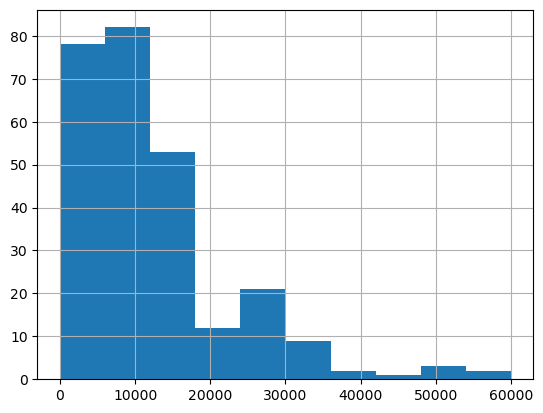

In [28]:
import matplotlib.pyplot as plt
menu['메뉴가격'].hist()

적당한 비닝과 유사도 계산을 위한 정규화 필요

In [29]:
menu['메뉴가격'].value_counts()

6000.0     24
7000.0     22
8000.0     17
10000.0    15
15000.0    14
13000.0    11
5000.0     11
3000.0     10
14000.0    10
12000.0     9
25000.0     9
9000.0      9
30000.0     8
4000.0      7
2000.0      7
17000.0     6
35000.0     6
16000.0     5
18000.0     5
20000.0     5
5500.0      4
50000.0     3
11000.0     3
22000.0     3
3500.0      3
4500.0      2
9800.0      2
3900.0      2
60000.0     2
6500.0      2
29000.0     2
1000.0      1
23900.0     1
20900.0     1
38000.0     1
4900.0      1
7500.0      1
2600.0      1
28000.0     1
42000.0     1
1500.0      1
19000.0     1
33000.0     1
11500.0     1
5800.0      1
26000.0     1
23000.0     1
17900.0     1
1.0         1
32000.0     1
6600.0      1
1700.0      1
34000.0     1
13500.0     1
45000.0     1
3800.0      1
Name: 메뉴가격, dtype: int64

In [30]:
menu['메뉴가격']

0      10000.0
1      15000.0
2       5500.0
3      10000.0
4      12000.0
        ...   
258    10000.0
259     4900.0
260     4500.0
261     3800.0
262    17000.0
Name: 메뉴가격, Length: 263, dtype: float64

In [31]:
# 최대최소정규화를 통해 0부터 1까지의 값으로 스케일링
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
transformer.fit(menu[['메뉴가격']])
# print(transformer.data_min_)
# print(transformer.data_max_)
scale_cost = transformer.transform(menu[['메뉴가격']]).reshape(-1,)
print(scale_cost)

[0.16665278 0.2499875  0.09165153 0.16665278 0.19998667 0.13331889
 0.13331889 0.2499875  0.099985   0.13331889 0.11665194 0.11665194
 0.74999583 0.2499875  0.16665278 0.03331722 0.21665361 0.83333056
 0.58332639 1.         0.099985   0.49999167 0.13331889 0.08331806
 0.49999167 0.07498458 0.26665444 0.28332139 0.22498708 0.14998583
 0.2499875  0.099985   0.099985   0.21665361 0.23332056 0.2499875
 0.099985   0.11665194 0.2499875  0.03331722 0.06665111 0.41665694
 0.16665278 0.08331806 0.33332222 0.099985   0.16665278 0.21665361
 0.19998667 0.099985   0.10831847 0.03331722 0.08331806 0.13331889
 0.06665111 0.04998417 0.04998417 0.04998417 0.06665111 0.05831764
 0.28332139 0.11665194 0.16665278 0.26665444 0.08331806 0.14998583
 0.23332056 0.41665694 0.11665194 0.08331806 0.41665694 0.13331889
 0.16665278 0.56665944 0.5499925  0.099985   0.099985   0.06665111
 0.06665111 0.11665194 0.11665194 0.13331889 0.23332056 0.41665694
 0.41665694 0.58332639 0.49999167 0.2499875  0.11665194 0.09998

In [32]:
menu[['메뉴가격']].메뉴가격

0      10000.0
1      15000.0
2       5500.0
3      10000.0
4      12000.0
        ...   
258    10000.0
259     4900.0
260     4500.0
261     3800.0
262    17000.0
Name: 메뉴가격, Length: 263, dtype: float64

In [33]:
# 메뉴가격 차를 이용하여 가격 고려
mat1 = np.repeat([scale_cost], len(menu['메뉴가격']) , axis=0)
mat2 = mat1.T
cost_sim = np.ones((len(menu['메뉴가격']), len(menu['메뉴가격']))) - abs(mat1-mat2)
cost_sim

array([[1.        , 0.91666528, 0.92499875, ..., 0.90833181, 0.89666494,
        0.88333139],
       [0.91666528, 1.        , 0.84166403, ..., 0.82499708, 0.81333022,
        0.96666611],
       [0.92499875, 0.84166403, 1.        , ..., 0.98333306, 0.97166619,
        0.80833014],
       ...,
       [0.90833181, 0.82499708, 0.98333306, ..., 1.        , 0.98833314,
        0.79166319],
       [0.89666494, 0.81333022, 0.97166619, ..., 0.98833314, 1.        ,
        0.77999633],
       [0.88333139, 0.96666611, 0.80833014, ..., 0.79166319, 0.77999633,
        1.        ]])

In [34]:
menu_simi_co = (cosine_sim * 1 # 1. 텍스트 유사도
                 + cost_sim * 0.01  # 2. 가격
                 )

menu_simi_co_sorted_ind = menu_simi_co.argsort()[:, ::-1]

# 최종 구현 함수
def find_simi_menu(menu_name):
    
    idx = indices[menu_name]
    sim_scores = list(enumerate(menu_simi_co[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    menu_indices = [i[0] for i in sim_scores]
    return menu_cates.iloc[menu_indices][:5]

In [35]:
find_simi_menu('닭갈비')

84      깐풍기
103     주물럭
7        물회
185     라조육
62     부대찌개
Name: 메뉴카테고리소분류명, dtype: object

In [36]:
display(menu[menu['메뉴카테고리소분류명']=='닭갈비'])
display(menu[menu['메뉴카테고리소분류명']=='깐풍기'])
display(menu[menu['메뉴카테고리소분류명']=='주물럭'])

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비,"야채,고추,닭고기,양배추 한식 닭갈비"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
84,25000.0,N,"야채,고추,닭고기,전분",중식,깐풍기,"야채,고추,닭고기,전분 중식 깐풍기"


,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
103,6000.0,N,"야채,고추,고기",한식,주물럭,"야채,고추,고기 한식 주물럭"


In [37]:
menu[menu['메뉴카테고리소분류명']=='닭갈비']

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
4,12000.0,Y,"야채,고추,닭고기,양배추",한식,닭갈비,"야채,고추,닭고기,양배추 한식 닭갈비"


In [38]:
menu[menu['메뉴카테고리소분류명']=='통닭']

,메뉴가격,지역특산메뉴여부,메뉴설명(MENU_DSCRN),메뉴카테고리대분류명,메뉴카테고리소분류명,soup
163,12000.0,N,"닭고기,밀가루",패스트푸드,통닭,"닭고기,밀가루 패스트푸드 통닭"


In [39]:
menu_simi_co = (cosine_sim * 1 # 1. 텍스트 유사도
                 + cost_sim * 0.01  # 2. 가격
                 )

menu_simi_co_sorted_ind = menu_simi_co.argsort()[:, ::-1]

# 최종 구현 함수
def find_simi_menu(menu_name):
    
    idx = indices[menu_name]
    sim_scores = list(enumerate(menu_simi_co[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    menu_indices = [i[0] for i in sim_scores]
    return menu_cates.iloc[menu_indices][:5]

## 카테고리 가중치 추가

In [40]:
find_simi_menu('닭갈비')

84      깐풍기
103     주물럭
7        물회
185     라조육
62     부대찌개
Name: 메뉴카테고리소분류명, dtype: object

In [110]:
menu_simi_co = (cosine_sim * 1 # 1. 텍스트 유사도
                 + cost_sim * 0.01  # 2. 가격
                 )

menu_simi_co_sorted_ind = menu_simi_co.argsort()[:, ::-1]

# 최종 구현 함수
def find_simi_menu(menu_name):
    
    idx = indices[menu_name]    
    
    #사용자에 대한 메뉴 가중치 파일 받아오기
    menu_ratio = pd.read_csv('menu_ratio', index_col=0)
    
    a = list(menu['메뉴카테고리대분류명'])
    replacements = {'한식':float(menu_ratio.loc['한식']),
                   '제과류':float(menu_ratio.loc['카페']),
                   '양식':float(menu_ratio.loc['양식']),
                   '아시아/퓨전 음식':float(menu_ratio.loc['아시아/퓨전 음식']),
                   '일식':float(menu_ratio.loc['일식']),
                   '패스트푸드':float(menu_ratio.loc['분식/치킨']),
                   '중식':float(menu_ratio.loc['중식']),
                   '기타':0}
    replacer = replacements.get
    
    w = 1 #카테고리 가중치 설정
    #카테고리 선호비율을 축소하고 최종 추천된 메뉴점수에 더하기
    menu_simi = menu_simi_co[idx]+ [x*y for x,y in zip([replacer(n, n) for n in a],[w]*len(a))]
    sim_scores = list(enumerate(menu_simi))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    menu_indices = [i[0] for i in sim_scores]
    return menu_cates.iloc[menu_indices][:5]

## 사용자유형 가중치 추가

In [146]:
menu_simi_co = (cosine_sim * 1 # 1. 텍스트 유사도
                 + cost_sim * 0.01  # 2. 가격
                 )

menu_simi_co_sorted_ind = menu_simi_co.argsort()[:, ::-1]

# 입력변수가 하나 더 생겨서 파일 한꺼번에 돌릴시 중간에러를 방지하기 위해 함수이름을 바꿉니다..
def find_simi_menu_ver3(menu_name,w): #여기서 w는 사용자유형에 대한 가중치
    
    idx = indices[menu_name]    
    
    #사용자에 대한 메뉴 가중치 파일 받아오기
    menu_ratio = pd.read_csv('menu_ratio', index_col=0)
    
    a = list(menu['메뉴카테고리대분류명'])
    replacements = {'한식':float(menu_ratio.loc['한식']),
                   '제과류':float(menu_ratio.loc['카페']),
                   '양식':float(menu_ratio.loc['양식']),
                   '아시아/퓨전 음식':float(menu_ratio.loc['아시아/퓨전 음식']),
                   '일식':float(menu_ratio.loc['일식']),
                   '패스트푸드':float(menu_ratio.loc['분식/치킨']),
                   '중식':float(menu_ratio.loc['중식']),
                   '기타':0}
    replacer = replacements.get
    cate_w = 1 #카테고리 가중치 설정
    
    # 사용자 유형의 메뉴선호 반영
    user_type_like = pd.read_csv('user_type_like', index_col=0)
    
    menu_simi = menu_simi_co[idx]+ [x*y for x,y in zip([replacer(n, n) for n in a],[cate_w]*len(a))] + user_type_like.loc[w[0]].values *(0.01)*w[1]
    sim_scores = list(enumerate(menu_simi))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    menu_indices = [i[0] for i in sim_scores]
    return menu_cates.iloc[menu_indices][:5]

In [144]:
#확인용
find_simi_menu_ver3('닭갈비',['건강식단추구',0])

176     샌드위치
14       케이크
54     아이스크림
153      젤라또
156       와플
Name: 메뉴카테고리소분류명, dtype: object

In [143]:
#확인용
find_simi_menu_ver3('닭갈비',['경제성추구',0.615353])

176    샌드위치
155     토스트
156      와플
170    튀김만두
153     젤라또
Name: 메뉴카테고리소분류명, dtype: object

## 사용자별 메뉴 결측치 빈도수 채우기 위한 음식 유사도 행렬

In [45]:
menu_simi_co

array([[1.01      , 0.02050399, 0.03542243, ..., 0.01668892, 0.00896665,
        0.01749757],
       [0.02050399, 1.01      , 0.02530265, ..., 0.05816008, 0.03811718,
        0.15840653],
       [0.03542243, 0.02530265, 1.01      , ..., 0.02116123, 0.00971666,
        0.02098797],
       ...,
       [0.01668892, 0.05816008, 0.02116123, ..., 1.01      , 0.02999788,
        0.04605908],
       [0.00896665, 0.03811718, 0.00971666, ..., 0.02999788, 1.01      ,
        0.03071433],
       [0.01749757, 0.15840653, 0.02098797, ..., 0.04605908, 0.03071433,
        1.01      ]])

In [47]:
transformer = MinMaxScaler()
transformer.fit(menu_simi_co)
simi_menu = transformer.transform(menu_simi_co)
simi_menu = pd.DataFrame(simi_menu)
simi_menu

,0,1,2,3,4,5,6,7,8,9,...,253,254,255,256,257,258,259,260,261,262
0,1.000000,0.016243,0.029386,0.020836,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
1,0.013791,1.000000,0.019307,0.013791,0.011075,0.010859,0.014108,0.012216,0.019309,0.020072,...,0.005789,0.012210,0.007442,0.019165,0.016644,0.027319,0.005790,0.055324,0.037136,0.150954
2,0.028660,0.021013,1.000000,0.028660,0.021725,0.022556,0.030056,0.023357,0.185907,0.020922,...,0.022149,0.023345,0.006532,0.182965,0.016806,0.007521,0.019280,0.018604,0.008999,0.013946
3,0.020836,0.016243,0.029386,1.000000,0.015962,0.016292,0.021327,0.016731,0.029388,0.016278,...,0.016546,0.016722,0.007276,0.027594,0.013960,0.008265,0.014619,0.014165,0.008256,0.010466
4,0.016289,0.013861,0.022780,0.016289,1.000000,0.012838,0.016661,0.083491,0.022782,0.013623,...,0.013825,0.013430,0.007607,0.021645,0.011863,0.007934,0.012362,0.012017,0.007926,0.047627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.003322,0.024901,0.003320,0.003322,0.002659,0.003321,0.003321,0.001663,0.003320,0.006620,...,0.028271,0.035188,0.007276,0.001496,0.006623,1.000000,0.024068,0.019964,0.035476,0.017102
259,0.010511,0.004126,0.015926,0.010511,0.007915,0.009089,0.011399,0.007728,0.015762,0.006438,...,0.049819,0.007724,0.006433,0.012622,0.005778,0.024859,1.000000,0.007460,0.009098,0.000980
260,0.009989,0.053680,0.015183,0.009989,0.007503,0.008686,0.010865,0.007270,0.015018,0.015951,...,0.007526,0.007266,0.006367,0.011878,0.012990,0.020693,0.007395,1.000000,0.029092,0.038942
261,0.002292,0.033754,0.003785,0.002292,0.001628,0.002956,0.002956,0.000632,0.003619,0.006256,...,0.007575,0.000632,0.033021,0.000465,0.005596,0.034488,0.007279,0.027374,1.000000,0.023643


뭐지 왜 대칭 아니지

In [44]:
# 다른 파일에서도 쓰려고 저장하기
simi_menu.to_csv('simi_menu')